[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/BoiMat/Python_course_CIOFS_2023/blob/main/Lezione_8/Lezione_8.2_Progetto.ipynb)

# Progetto: Temperatura giornaliera

In questa lezione riassuntiva genereremo dati simulati delle temperature nell'arco di un mese tramite la libreria NumPy.
Successivamente li visualizzeremo in un grafico tramite l'utilizzo di MatPlotLib.

In [ ]:
# installare la libreria numpy
!pip install numpy

In [1]:
# importare la libreria numpy
import numpy as np

In [2]:
def seno(angolo_radianti):
    return np.sin(angolo_radianti)

# Esempio di utilizzo:
angolo_di_prova = np.pi/4  # Angolo di 45 gradi convertito in radianti
risultato = seno(angolo_di_prova)
print(f"Il seno di {angolo_di_prova} radianti è {risultato}")

Il seno di 0.7853981633974483 radianti è 0.7071067811865475


In [13]:
np.random.seed(42)  # Per riproducibilità

# Creazione di dati giornalieri per temperatura massima e precipitazioni
days = np.arange(1, 31)
max_temperature = np.random.randint(20, 35, size=30)
precipitation = np.random.uniform(0, 15, size=30)

In [14]:
# Uniamo le liste in una singola variabile
# simulated_data = np.array((days, max_temperature, precipitation))
simulated_data = np.column_stack((days, max_temperature, precipitation))
print(simulated_data)

[[ 1.         26.          9.26222264]
 [ 2.         23.          9.17479741]
 [ 3.         32.          0.10599458]
 [ 4.         34.          0.34593638]
 [ 5.         30.          7.8716199 ]
 [ 6.         27.          5.99791458]
 [ 7.         32.          0.69998495]
 [ 8.         24.         14.60633278]
 [ 9.         26.          3.49157011]
 [10.         29.          1.35909652]
 [11.         22.          9.27579014]
 [12.         26.          5.73692987]
 [13.         30.         14.74846329]
 [14.         30.          7.0014434 ]
 [15.         27.         12.8991061 ]
 [16.         24.         10.20461308]
 [17.         23.          6.75748878]
 [18.         27.          0.19897442]
 [19.         27.         14.13302634]
 [20.         22.          8.44932327]
 [21.         25.          5.78124754]
 [22.         24.          0.23949378]
 [23.         21.          3.46340738]
 [24.         27.          3.61538199]
 [25.         31.         10.24895278]
 [26.         33.        

In [5]:
# Funzione per convertire da Celsius a Fahrenheit
def celsius_to_fahrenheit(celsius):
    return (celsius * 9/5) + 32

In [8]:
# Estrazione delle colonne specifiche (pratica con lo slicing)
days = simulated_data[:, 0]
max_temperature_celsius = simulated_data[:, 1]
precipitation = simulated_data[:, 2]

In [9]:
# Convertire la temperatura massima da Celsius a Fahrenheit
max_temperature_fahrenheit = celsius_to_fahrenheit(max_temperature_celsius)

In [10]:
# Analisi e visualizzazione dei dati
avg_temperature_celsius = np.mean(max_temperature_celsius)
avg_temperature_fahrenheit = celsius_to_fahrenheit(avg_temperature_celsius)
rainy_days = np.sum(precipitation > 5)

In [11]:
print(f"Temperatura Media: {avg_temperature_celsius:.2f}°C / {avg_temperature_fahrenheit:.2f}°F")
print(f"Giorni con Pioggia: {rainy_days}")

Temperatura Media: 26.77°C / 80.18°F
Giorni con Pioggia: 19


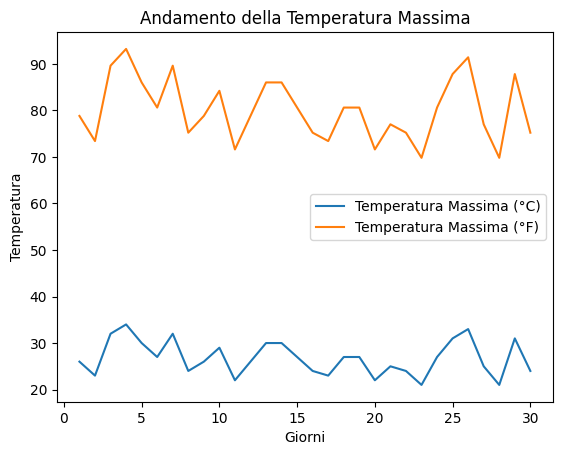

In [15]:
# Creazione di un grafico
import matplotlib.pyplot as plt

plt.plot(days, max_temperature_celsius, label="Temperatura Massima (°C)")
plt.plot(days, max_temperature_fahrenheit, label="Temperatura Massima (°F)")
plt.xlabel("Giorni")
plt.ylabel("Temperatura")
plt.title("Andamento della Temperatura Massima")
plt.legend()
plt.show()

# Temperature annuali

Generiamo adesso dati per l'intero anno solare (365 giorni) utilizzando una funzione sinusoidale per simulare l'aumento delle temperature nei mesi estivi e la diminuzione nei mesi invernali

In [16]:
def generate_temperature_data(size, seed=None):

    if seed is not None:
        np.random.seed(seed)

    # Genera dati casuali sulla temperatura con variazioni stagionali
    time = np.linspace(0, 2 * np.pi, size) + 10  # Un anno diviso in 4 stagioni
    temperature_mean = 20  # Temperatura media annuale
    amplitude = 10  # Ampiezza delle variazioni stagionali

    temperature = temperature_mean + amplitude * seno(time)

    # Aggiungi un po' di rumore casuale ai dati
    noise = np.random.normal(0, 2, size)
    temperature_with_noise = temperature + noise

    return time, temperature_with_noise

In [17]:
# Genera dati sulla temperatura per 365 giorni (un anno)
days_in_year = 365
time, temperature_data = generate_temperature_data(days_in_year, seed=42)

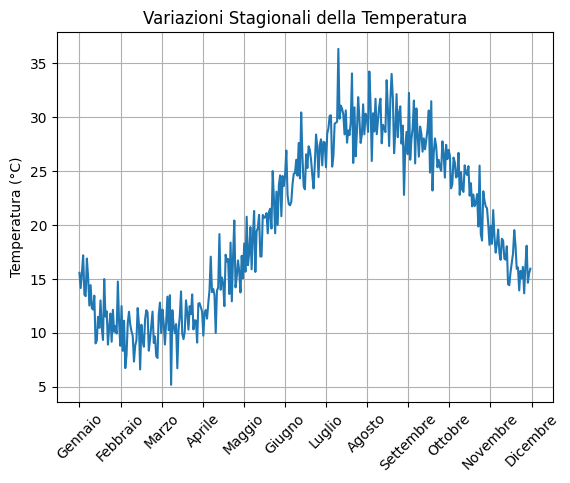

In [18]:
# Visualizza i dati
plt.plot(np.arange(0,365), temperature_data)
plt.title('Variazioni Stagionali della Temperatura')
# plt.xlabel('Tempo (giorni)')
plt.ylabel('Temperatura (°C)')
plt.xticks(np.linspace(0, 365, 12), ['Gennaio', 'Febbraio', 'Marzo', 'Aprile', 'Maggio', 'Giugno', 'Luglio', 'Agosto', 'Settembre', 'Ottobre', 'Novembre', 'Dicembre'], rotation=45)
plt.grid(True)
plt.show()